# Clustering Analysis of Spotify Data

This notebook performs clustering analysis on the Spotify numerical features dataset using:
1. KMeans clustering with elbow method and silhouette analysis
2. DBSCAN clustering
3. Comparison and final cluster assignments

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

## 1. Data Loading and Scaling

In [3]:
# Load the data
print("Loading data...")
df = pd.read_csv('../data/5_spotify_numerical.csv')

# Filter for genres with at least 30 entries
genre_counts = df.sum()
popular_genres = genre_counts[genre_counts >= 30].index
df = df[popular_genres]

print("Shape of the dataset:", df.shape)
df.head()

Loading data...
Shape of the dataset: (9991, 226)


,release_date,popularity,duration_ms,explicit,abstract hip hop,acoustic blues,adult standards,album rock,alternative dance,alternative hip hop,...,urban contemporary,velha guarda,viking metal,vintage chanson,vocal jazz,west coast rap,western swing,yacht rock,ye ye,zolo
0,2008,14,150040,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2004,1,253000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,3,240400,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2007,1,138760,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022,0,199986,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Scale the data and save scaler for later use
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
print("Data has been scaled using StandardScaler")

# Save scaler for later reuse
import pickle
with open('../scaler/spotify_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("Scaler saved to '../scaler/spotify_scaler.pkl'")

Data has been scaled using StandardScaler
Scaler saved to '../scaler/spotify_scaler.pkl'


## 2. KMeans Clustering Analysis

In [5]:
# Perform elbow method and silhouette analysis
inertia = []
silhouette_scores = []
range_n_clusters = range(2, 100)

for n_clusters in range_n_clusters:
    print(f"Testing {n_clusters} clusters...")
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    
    # Calculate metrics
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    print(f"Silhouette score for {n_clusters} clusters: {silhouette_avg:.3f}")

Testing 2 clusters...
Silhouette score for 2 clusters: 0.217
Testing 3 clusters...
Silhouette score for 3 clusters: 0.219
Testing 4 clusters...
Silhouette score for 4 clusters: 0.215
Testing 5 clusters...
Silhouette score for 5 clusters: 0.222
Testing 6 clusters...
Silhouette score for 6 clusters: 0.225
Testing 7 clusters...
Silhouette score for 7 clusters: 0.227
Testing 8 clusters...
Silhouette score for 8 clusters: 0.177
Testing 9 clusters...
Silhouette score for 9 clusters: 0.182
Testing 10 clusters...
Silhouette score for 10 clusters: 0.188
Testing 11 clusters...
Silhouette score for 11 clusters: 0.190
Testing 12 clusters...
Silhouette score for 12 clusters: 0.196
Testing 13 clusters...
Silhouette score for 13 clusters: 0.205
Testing 14 clusters...
Silhouette score for 14 clusters: 0.066
Testing 15 clusters...
Silhouette score for 15 clusters: 0.071
Testing 16 clusters...
Silhouette score for 16 clusters: 0.075
Testing 17 clusters...
Silhouette score for 17 clusters: 0.080
Testing 

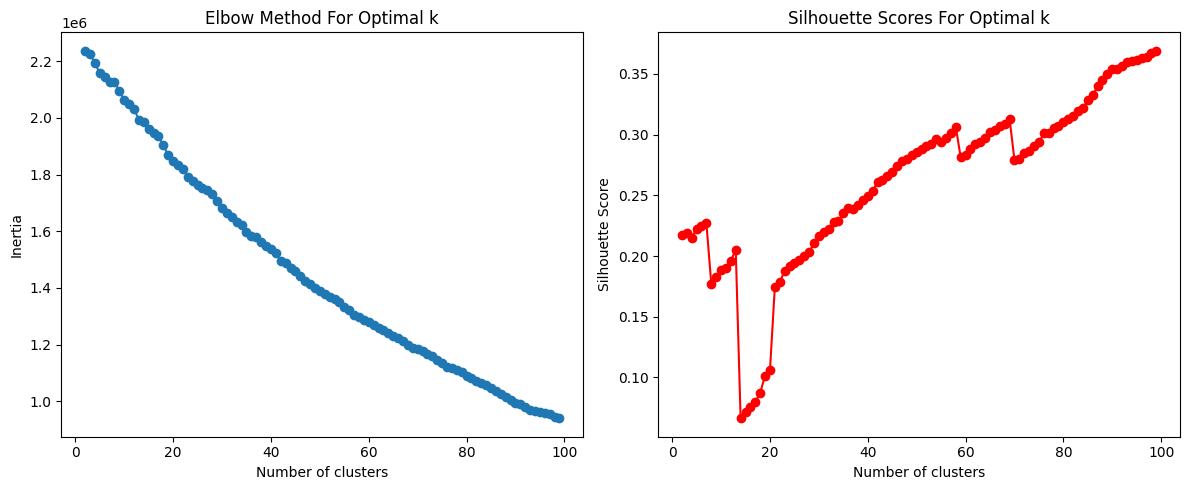

Elbow and silhouette plots saved as 'elbow_silhouette_analysis.png'.


<Figure size 640x480 with 0 Axes>

In [32]:
# Plot elbow method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='red')
plt.title('Silhouette Scores For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()
# export my plot
plt.savefig('../stills/elbow_silhouette_analysis.png')
print("Elbow and silhouette plots saved as 'elbow_silhouette_analysis.png'.")


Elbow and silhouette plots saved as 'elbow_silhouette_analysis.png'.


<Figure size 640x480 with 0 Axes>

In [57]:
# Save scaled data to CSV
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.to_csv('../data/6_spotify_numerical_scaled.csv', index=False)



## 3. DBSCAN Clustering

In [8]:
# Try different DBSCAN parameters with wider range
eps_values = [0.5, 1.0, 1.5, 2.0, 2.5]  # Increased range
min_samples_values = [3, 5, 100]  # Lower minimum samples

best_silhouette = -1
best_params = None

for eps in eps_values:
    for min_samples in min_samples_values:
        print(f"\nTesting DBSCAN with eps={eps}, min_samples={min_samples}")
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_data)
        
        # Count number of clusters (excluding noise points labeled as -1)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        print(f"Number of clusters found: {n_clusters}")
        print(f"Number of noise points: {n_noise}")
        
        # Only calculate silhouette score if there's more than one cluster and not all points are noise
        if n_clusters > 1:
            # Filter out noise points for silhouette score calculation
            mask = labels != -1
            if np.sum(mask) > 1:  # Make sure we have at least 2 points
                score = silhouette_score(scaled_data[mask], labels[mask])
                print(f"Silhouette score: {score:.3f}")
                
                if score > best_silhouette:
                    best_silhouette = score
                    best_params = (eps, min_samples)
        else:
            print("Invalid clustering result - no clear clusters found")

if best_params is not None:
    print(f"\nBest DBSCAN parameters: eps={best_params[0]}, min_samples={best_params[1]}")
    print(f"Best silhouette score: {best_silhouette:.3f}")
else:
    print("\nNo valid clustering results found. Try adjusting the parameter ranges.")
    print("Suggestions:")
    print("1. Increase the eps values range")
    print("2. Decrease the min_samples values")
    print("3. Check if your data is properly scaled")


Testing DBSCAN with eps=0.5, min_samples=3
Number of clusters found: 415
Number of noise points: 4043
Silhouette score: 0.491

Testing DBSCAN with eps=0.5, min_samples=5
Number of clusters found: 121
Number of noise points: 5126
Silhouette score: 0.571

Testing DBSCAN with eps=0.5, min_samples=100
Number of clusters found: 1
Number of noise points: 7103
Invalid clustering result - no clear clusters found

Testing DBSCAN with eps=1.0, min_samples=3
Number of clusters found: 567
Number of noise points: 2129
Silhouette score: 0.707

Testing DBSCAN with eps=1.0, min_samples=5
Number of clusters found: 248
Number of noise points: 3300
Silhouette score: 0.732

Testing DBSCAN with eps=1.0, min_samples=100
Number of clusters found: 2
Number of noise points: 6306
Silhouette score: 0.644

Testing DBSCAN with eps=1.5, min_samples=3
Number of clusters found: 616
Number of noise points: 1225
Silhouette score: 0.743

Testing DBSCAN with eps=1.5, min_samples=5
Number of clusters found: 332
Number of

## 4. Final Clustering and Save Results

In [9]:
# Choose the best method (KMeans or DBSCAN) based on silhouette scores
# For this example, we'll use KMeans with the optimal k
optimal_k = 58  # Update this based on your elbow method and silhouette analysis results

# Fit KMeans model
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = final_kmeans.fit_predict(scaled_data)

# Fit DBSCAN model with best parameters
best_dbscan = DBSCAN(eps=best_params[0], min_samples=best_params[1])
dbscan_labels = best_dbscan.fit_predict(scaled_data)

# Save the models
import pickle
with open('../models/kmeans_model.pkl', 'wb') as f:
    pickle.dump(final_kmeans, f)
with open('../models/dbscan_model.pkl', 'wb') as f:
    pickle.dump(best_dbscan, f)

# Save the results
df.to_csv('../data/7_clustered_dataset.csv', index=False)
print(f"Models saved as kmeans_model.pkl and dbscan_model.pkl")
print(f"Results saved to 7_clustered_dataset.csv")

# Display cluster distribution
print("\nKMeans cluster distribution:")
print(df['cluster'].value_counts())
print("\nDBSCAN cluster distribution:")
print(pd.Series(dbscan_labels).value_counts())


Models saved as kmeans_model.pkl and dbscan_model.pkl
Results saved to 7_clustered_dataset.csv

KMeans cluster distribution:
cluster
1     6597
25     238
43     178
18     159
0      136
36     123
49     120
48     107
16     106
22      88
42      74
24      73
6       71
11      69
4       69
56      68
15      65
53      65
17      64
3       59
57      59
9       56
12      52
31      52
7       51
13      51
19      49
23      47
14      45
2       45
35      45
46      44
47      44
54      40
30      40
29      39
41      39
44      39
5       39
28      38
39      37
52      37
55      36
37      36
10      34
33      33
40      31
8       31
34      30
51      30
27      30
26      30
20      29
21      27
38      26
50      25
32      23
45      23
Name: count, dtype: int64

DBSCAN cluster distribution:
 2      3628
-1       702
 3       213
 163      70
 136      60
        ... 
 639       3
 643       3
 645       3
 647       3
 648       3
Name: count, Length: 650, dtyp

In [19]:
df.cluster.nunique()

58

displaying genres that were removed

In [13]:
# Get list of columns that were dropped
original_columns = pd.read_csv('../data/5_spotify_numerical.csv').columns
current_columns = df.columns
dropped_genres = [col for col in original_columns if col not in current_columns and col != 'cluster']

print("Genres that were removed during preprocessing:")
for genre in dropped_genres:
    print(f"- {genre}")



Genres that were removed during preprocessing:
- "childrens choir
- "childrens music
- "mans orchestra
- "punk n roll
- "womens music
- 21st century classical
- abstract
- accordeon
- accordion
- acid house
- acid jazz
- acid rock
- acid trance
- acousmatic
- acoustic pop
- acoustic rock
- african-american classical
- afro-cuban percussion
- afrobeat
- afrobeat fusion
- afrobeats
- afropop
- aggrotech
- alaska indie
- alberta country
- alternative americana
- alternative country
- alternative metalcore
- alternative pop
- alternative r&b
- alternative roots rock
- ambient
- ambient black metal
- ambient dub
- ambient idm
- ambient industrial
- ambient psychill
- ambient worship
- american choir
- american contemporary classical
- american folk revival
- american grindcore
- american metalcore
- american modern classical
- american oi
- american post-rock
- american romanticism
- amharic pop
- anthem emo
- anti-folk
- appalachian folk
- arab folk
- arab groove
- arab pop
- arabesk
- arg

In [25]:
original_df = pd.read_csv('../data/4_spotify_million_tracks.csv')
original_df.columns

Index(['original_title', 'original_artist', 'spotify_title', 'spotify_artist',
       'album', 'release_date', 'popularity', 'duration_ms', 'explicit',
       'album_cover', 'genres'],
      dtype='object')

In [26]:
clustered_df = pd.read_csv("../data/7_clustered_dataset.csv")
clustered_df.columns

Index(['release_date', 'popularity', 'duration_ms', 'explicit',
       'abstract hip hop', 'acoustic blues', 'adult standards', 'album rock',
       'alternative dance', 'alternative hip hop',
       ...
       'velha guarda', 'viking metal', 'vintage chanson', 'vocal jazz',
       'west coast rap', 'western swing', 'yacht rock', 'ye ye', 'zolo',
       'cluster'],
      dtype='object', length=227)

In [27]:
assert len(original_df) == len(clustered_df), "Dataset lengths don't match!"


creating the new clustered dataset and bringing back the categorical columns

In [28]:
# Load the original Spotify tracks dataset and the clustered data
original_df = pd.read_csv('../data/4_spotify_million_tracks.csv')

# remove genres we filtered from before to keep consistency
original_df = original_df.drop(columns=dropped_genres)


clustered_df = pd.read_csv('../data/7_clustered_dataset.csv')

# Ensure the datasets are aligned
assert len(original_df) == len(clustered_df), "Dataset lengths don't match!"

categorical_columns = [
    'original_title', 'original_artist', 'spotify_title', 'spotify_artist',
    'album', 'release_date', 'popularity', 'duration_ms', 'explicit', 'album_cover'
]

# Merge the clustered dataset with the categorical columns from the original dataset
final_df = clustered_df.merge(original_df[categorical_columns], left_index=True, right_index=True)


# Save the final dataset
final_df.to_csv('../data/8_spotify_million_tracks_clustered.csv', index=False)

# Display some information about the final dataset
print("Final dataset shape:", final_df.shape)
print("\nColumns in final dataset:")
print(final_df.columns.tolist())
print("\nSample of final dataset:")
print(final_df.head())
print("\nCluster distributions:")
print("\nKMeans clusters:")
print(final_df['kmeans_cluster'].value_counts())
print("\nDBSCAN clusters:")
print(final_df['dbscan_cluster'].value_counts().head())

KeyError: '[\'"childrens choir\', \'"childrens music\', \'"mans orchestra\', \'"punk n roll\', \'"womens music\', \'21st century classical\', \'abstract\', \'accordeon\', \'accordion\', \'acid house\', \'acid jazz\', \'acid rock\', \'acid trance\', \'acousmatic\', \'acoustic pop\', \'acoustic rock\', \'african-american classical\', \'afro-cuban percussion\', \'afrobeat\', \'afrobeat fusion\', \'afrobeats\', \'afropop\', \'aggrotech\', \'alaska indie\', \'alberta country\', \'alternative americana\', \'alternative country\', \'alternative metalcore\', \'alternative pop\', \'alternative r&b\', \'alternative roots rock\', \'ambient\', \'ambient black metal\', \'ambient dub\', \'ambient idm\', \'ambient industrial\', \'ambient psychill\', \'ambient worship\', \'american choir\', \'american contemporary classical\', \'american folk revival\', \'american grindcore\', \'american metalcore\', \'american modern classical\', \'american oi\', \'american post-rock\', \'american romanticism\', \'amharic pop\', \'anthem emo\', \'anti-folk\', \'appalachian folk\', \'arab folk\', \'arab groove\', \'arab pop\', \'arabesk\', \'argentine ambient\', \'argentine indie\', \'argentine punk\', \'argentine reggae\', \'arkansas country\', \'arkansas metal\', \'armenian pop\', \'art pop\', \'art punk\', \'asmr\', \'athens indie\', \'atl hip hop\', \'atl trap\', \'atlanta bass\', \'atlanta metal\', \'atlanta punk\', \'atmospheric black metal\', \'atmospheric dnb\', \'atmospheric doom\', \'atmospheric post-metal\', \'atmospheric sludge\', \'auckland indie\', \'audiophile vocal\', \'austin americana\', \'austin metal\', \'austin singer-songwriter\', \'australian alternative rock\', \'australian classical\', \'australian dance\', \'australian death metal\', \'australian electropop\', \'australian house\', \'australian indie\', \'australian metal\', \'australian pop\', \'australian psych\', \'australian reggae fusion\', \'australian rock\', \'austrian black metal\', \'austrian metal\', \'austropop\', \'auteur-compositeur-interprete quebecois\', \'autonomous black metal\', \'avant-garde\', \'avant-garde jazz\', \'avant-garde metal\', \'axe\', \'azontobeats\', \'bachata\', \'bachata dominicana\', \'bahamian folk\', \'baiao\', \'bakersfield sound\', \'balkan folk metal\', \'balkan hip hop\', \'ballroom\', \'baltic black metal\', \'banda\', \'bandoneon\', \'banjo\', \'barbadian pop\', \'barbershop\', \'barnsagor\', \'baroque\', \'baroque pop\', \'barrelhouse piano\', \'bass music\', \'bassline\', \'baton rouge rap\', \'battle rap\', \'bay area indie\', \'bboy\', \'beatdown\', \'beatlesque\', \'bebop\', \'belgian black metal\', \'belgian contemporary classical\', \'belgian dance\', \'belgian electronic\', \'belgian experimental\', \'belgian indie\', \'belgian indie rock\', \'belgian jazz\', \'belgian metal\', \'belgian rock\', \'benga\', \'big band\', \'big room\', \'birmingham metal\', \'black comedy\', \'black n roll"\', \'black punk\', \'black thrash\', \'blackened deathcore\', \'blackgaze\', \'bleakgaze\', \'bloco\', \'bluegrass\', \'bluegrass gospel\', \'blues latinoamericano\', \'bolero\', \'bolero cubano\', \'bolero mexicano\', \'boogaloo\', \'boogie-woogie\', \'bosnian indie\', \'bossa nova jazz\', \'boston hardcore\', \'boston metal\', \'boston punk\', \'boy band\', \'brass band\', \'brazilian classical\', \'brazilian contemporary classical\', \'brazilian indie\', \'brazilian metal\', \'brazilian modern jazz\', \'brazilian percussion\', \'brazilian power metal\', \'brazilian progressive metal\', \'brazilian rock\', \'brazilian ska\', \'breakcore\', \'breton folk\', \'bristol electronic\', \'bristol indie\', \'brit funk\', \'britcore\', \'british alternative rock\', \'british black metal\', \'british classical piano\', \'british dance band\', \'british experimental\', \'british folk\', \'british grindcore\', \'british jazz\', \'british modern classical\', \'british soul\', \'british soundtrack\', \'broadway\', \'bronx hip hop\', \'brooklyn indie\', \'brostep\', \'brutal death metal\', \'brutal deathcore\', \'brutal prog\', \'bubble trance\', \'bubblegum dance\', \'bubblegum pop\', \'buffalo ny metal\', \'bulgarian pop\', \'c86\', \'cabaret\', \'cajun\', \'cali rap\', \'california hardcore\', \'calming instrumental\', \'canadian americana\', \'canadian blues\', \'canadian ccm\', \'canadian celtic\', \'canadian classical piano\', \'canadian contemporary country\', \'canadian country\', \'canadian electronic\', \'canadian folk\', \'canadian garage rock\', \'canadian hardcore\', \'canadian hip hop\', \'canadian indie\', \'canadian metal\', \'canadian metalcore\', \'canadian modern jazz\', \'canadian old school hip hop\', \'canadian pop\', \'canadian pop punk\', \'canadian post-hardcore\', \'canadian punk\', \'canadian singer-songwriter\', \'canadian soundtrack\', \'cancion infantil latinoamericana\', \'candy pop\', \'cantaditas\', \'cantautor\', \'cantautora argentina\', \'cantautora mexicana\', \'cante flamenco\', \'canterbury scene\', \'cape breton folk\', \'cape town indie\', \'cardiff indie\', \'carnaval cadiz\', \'carnaval limburg\', \'cartoon\', \'cedm\', \'celtic harp\', \'celtic metal\', \'celtic punk\', \'celtic rock\', \'cha-cha-cha\', \'chakra\', \'chalga\', \'chamber folk\', \'chamber pop\', \'chanson paillarde\', \'chanson quebecois\', \'chante nwel\', \'chaotic hardcore\', \'charanga\', \'chicago hardcore\', \'chicago house\', \'chicago punk\', \'chicago rap\', \'chicano punk\', \'chicano rap\', \'childrens music"\', \'chilean rock\', \'chilena\', \'chill house\', \'chill lounge\', \'chinderlieder\', \'chinese r&b\', \'choral\', \'choro\', \'choro contemporaneo\', \'christian a cappella\', \'christian death metal\', \'christian hardcore\', \'christian metal\', \'christian punk\', \'christian rock\', \'christmas instrumental\', \'christmas product\', \'classic arab pop\', \'classic australian country\', \'classic belgian pop\', \'classic bhangra\', \'classic bulgarian pop\', \'classic canadian rock\', \'classic cantopop\', \'classic colombian pop\', \'classic danish pop\', \'classic dubstep\', \'classic finnish rock\', \'classic french pop\', \'classic garage rock\', \'classic girl group\', \'classic greek pop\', \'classic hardstyle\', \'classic house\', \'classic indo pop\', \'classic italian pop\', \'classic j-pop\', \'classic mandopop\', \'classic norwegian pop\', \'classic oklahoma country\', \'classic pakistani pop\', \'classic persian pop\', \'classic progressive house\', \'classic psychedelic rock\', \'classic schlager\', \'classic swedish pop\', \'classic texas country\', \'classic uk pop\', \'classic venezuelan pop\', \'classical accordion\', \'classical era\', \'classical performance\', \'classical saxophone\', \'classical soprano\', \'classical tenor\', \'clean comedy\', \'cleveland indie\', \'cleveland metal\', \'cologne hip hop\', \'colombian pop\', \'colombian rock\', \'comedie musicale\', \'comedienne\', \'comedy\', \'comedy rock\', \'comic\', \'comic metal\', \'commons\', \'compositional ambient\', \'concert band\', \'concertina\', \'connecticut hardcore\', \'contemporary classical\', \'contemporary gospel\', \'contemporary jazz\', \'contemporary post-bop\', \'contemporary vocal jazz\', \'cool jazz\', \'copla\', \'corridos alternativos\', \'corrosion\', \'cosmic american\', \'cosmic death metal\', \'country boogie\', \'country quebecois\', \'country rap\', \'countrygaze\', \'coupe-decale\', \'cowpunk\', \'crossover thrash\', \'crunk\', \'cuban funk\', \'cuban rumba\', \'cumbia\', \'cumbia cristiana\', \'cybergrind\', \'cyberpunk\', \'cypriot pop\', \'czech metal\', \'czech pop\', \'czech pop rock\', \'czech rock\', \'dalarna indie\', \'dance-punk\', \'dancefloor dnb\', \'dancehall guyanaise\', \'dancehall queen\', \'danish alternative rock\', \'danish electronic\', \'danish electropop\', \'danish indie\', \'danish metal\', \'danish pop\', \'danish rock\', \'danish singer-songwriter\', \'dansband\', \'dansktop\', \'danspunk\', \'danzon\', \'dark ambient\', \'dark cabaret\', \'dark jazz\', \'dark pop\', \'dark rock\', \'dark wave\', \'dc hardcore\', \'death doom\', \'death metal\', \'deathcore\', \'deathgrind\', \'deathrock\', \'deep acoustic pop\', \'deep adult standards\', \'deep brazilian pop\', \'deep ccm\', \'deep chill\', \'deep comedy\', \'deep contemporary country\', \'deep deep house\', \'deep east coast hip hop\', \'deep eurodance\', \'deep g funk\', \'deep hardcore punk\', \'deep hardtechno\', \'deep house\', \'deep idm\', \'deep indie rock\', \'deep jazz fusion\', \'deep melodic hard rock\', \'deep new wave\', \'deep northern soul\', \'deep punk rock\', \'deep smooth jazz\', \'deep soft rock\', \'deep soundtrack\', \'deep talent show\', \'deep turkish pop\', \'deep uplifting trance\', \'deep vocal house\', \'dennery segment\', \'denton tx indie\', \'depressive black metal\', \'desert blues\', \'desi hip hop\', \'detroit indie\', \'detroit rock\', \'dfw rap\', \'didgeridoo\', \'digital hardcore\', \'dirty texas rap\', \'disco\', \'disco house\', \'diva house\', \'dixieland\', \'djent\', \'doom metal\', \'downtempo\', \'drama\', \'dream plugg\', \'dream pop\', \'drill and bass\', \'drone\', \'drone metal\', \'drum and bass\', \'dub metal\', \'dub techno\', \'duduk\', \'duranguense\', \'dusseldorf electronic\', \'dutch death metal\', \'dutch edm\', \'dutch house\', \'dutch indie\', \'dutch indie rock\', \'dutch metal\', \'dutch pop\', \'dutch rock\', \'early music\', \'early reggae\', \'early romantic era\', \'early synthpop\', \'early us punk\', \'east coast reggae\', \'easycore\', \'ebm\', \'ecm-style jazz\', \'ectofolk\', \'ecuadorian pop\', \'edm\', \'el paso indie\', \'electra\', \'electric bass\', \'electro\', \'electro dub\', \'electro house\', \'electro jazz\', \'electro latino\', \'electro swing\', \'electro-industrial\', \'electroacoustic composition\', \'electrofox\', \'electronic rock\', \'electronic trap\', \'electronica argentina\', \'electropop\', \'electropowerpop\', \'emo\', \'emocore\', \'emotional black metal\', \'english baroque\', \'english renaissance\', \'entehno\', \'essex indie\', \'estonian metal\', \'estonian pop\', \'estonian rock\', \'ethereal wave\', \'euphoric hardstyle\', \'europop\', \'exotica\', \'experimental\', \'experimental ambient\', \'experimental indie rock\', \'experimental pop\', \'experimental psych\', \'experimental rock\', \'experimental synth\', \'experimental vocal\', \'fado\', \'fantasy metal\', \'fidget house\', \'filmi\', \'filter house\', \'filthstep\', \'fingerstyle\', \'finnish black metal\', \'finnish blues\', \'finnish classical\', \'finnish dance pop\', \'finnish death metal\', \'finnish doom metal\', \'finnish hard rock\', \'finnish hip hop\', \'finnish melodeath\', \'finnish metal\', \'finnish pop\', \'finnish power metal\', \'finnish progressive metal\', \'flamenco\', \'flamenco electronica\', \'flamenco fusion\', \'flamenco guitar\', \'flemish folk\', \'flick hop\', \'florida hardcore\', \'flute rock\', \'folclor afrocolombiano\', \'folclor colombiano\', \'folclore portugues\', \'folk black metal\', \'folk punk\', \'folk rock italiano\', \'folklore argentino\', \'folklore quebecois\', \'folkmusik\', \'folktronica\', \'footwork\', \'forro\', \'fourth world\', \'freakbeat\', \'free folk\', \'free improvisation\', \'free jazz\', \'freestyle\', \'french folk\', \'french indie pop\', \'french jazz\', \'french metal\', \'french opera\', \'french reggae\', \'french romanticism\', \'french shoegaze\', \'french synthpop\', \'frevo\', \'funeral doom\', \'funk mexicano\', \'funk rock\', \'funktronica\', \'fussball\', \'future ambient\', \'future garage\', \'futurepop\', \'g funk\', \'gabber\', \'gabonese pop\', \'gaian doom\', \'gainesville indie\', \'gaita\', \'gaita colombiana\', \'gaita zuliana\', \'galante era\', \'galician folk\', \'galician jazz\', \'gambian hip hop\', \'garage house\', \'garage pop\', \'garage punk blues\', \'garage rock revival\', \'gbvfi\', \'german alternative rap\', \'german baroque\', \'german black metal\', \'german ccm\', \'german contemporary classical\', \'german country\', \'german dance\', \'german death metal\', \'german hard rock\', \'german hip hop\', \'german indie\', \'german jazz\', \'german metal\', \'german opera\', \'german orchestra\', \'german pagan metal\', \'german pop\', \'german prog\', \'german punk\', \'german rock\', \'german romanticism\', \'german soundtrack\', \'german techno\', \'german trance\', \'ghazal\', \'ghent indie\', \'girl group\', \'glam punk\', \'glitch hop\', \'glitch pop\', \'goregrind\', \'gospel blues\', \'gospel r&b\', \'gospel rap\', \'gospel reggae\', \'gospel singers\', \'gothabilly\', \'gothenburg indie\', \'gothenburg metal\', \'gothic black metal\', \'gothic rock\', \'gothic symphonic metal\', \'grave wave\', \'grebo\', \'greek contemporary classical\', \'greek folk\', \'greek guitar\', \'greek hip hop\', \'greek metal\', \'gregorian chant\', \'grindcore\', \'griot\', \'grunge pop\', \'grupera\', \'grupero romantico\', \'guitarra mexicana\', \'gypsy jazz\', \'halifax indie\', \'hamburg hip hop\', \'hamburg indie\', \'hammond organ\', \'hands up\', \'happy hardcore\', \'hard alternative\', \'hard bop\', \'hard glam\', \'hard house\', \'hard stoner rock\', \'hard trance\', \'hardcore\', \'hardcore techno\', \'hardingfele\', \'harlem hip hop\', \'harlem renaissance\', \'harmonica blues\', \'harmonica jazz\', \'harp\', \'hauntology\', \'healing\', \'hi-nrg\', \'high vibe\', \'hindi indie\', \'hip hop galsen\', \'hip hop quebecois\', \'hip pop\', \'historic piano performance\', \'hoerspiel\', \'hong kong indie\', \'honky tonk\', \'honky-tonk piano\', \'horror punk\', \'horrorcore\', \'house\', \'houston rap\', \'humppa\', \'hungarian folk\', \'hungarian hip hop\', \'hungarian pop\', \'hungarian rock\', \'hurdy-gurdy\', \'hyphy\', \'icelandic electronic\', \'icelandic indie\', \'idol\', \'idol rock\', \'illbient\', \'impressionism\', \'indian fusion\', \'indie anthem-folk\', \'indie catala\', \'indie electronica\', \'indie extremena\', \'indie folk\', \'indie jazz\', \'indie soul\', \'indorock\', \'industrial\', \'industrial hardcore\', \'industrial hip hop\', \'industrial rock\', \'instrumental acoustic guitar\', \'instrumental bluegrass\', \'instrumental funk\', \'instrumental hip hop\', \'instrumental post-rock\', \'instrumental soul\', \'instrumental stoner rock\', \'instrumental worship\', \'iowa indie\', \'irish accordion\', \'irish ballad\', \'irish banjo\', \'irish black metal\', \'irish country\', \'irish dance\', \'irish fiddle\', \'irish metal\', \'irish neo-traditional\', \'irish pub song\', \'irish rock\', \'irish singer-songwriter\', \'iskelma\', \'isle of man indie\', \'israeli hip hop\', \'italian adult pop\', \'italian alternative\', \'italian baroque\', \'italian classical piano\', \'italian contemporary jazz\', \'italian doom metal\', \'italian folk metal\', \'italian gothic metal\', \'italian hip hop\', \'italian jazz fusion\', \'italian metal\', \'italian opera\', \'italian pop\', \'italian power metal\', \'italian reggae\', \'italian romanticism\', \'italian soprano\', \'italian soundtrack\', \'italian tenor\', \'italian trance\', \'italian underground hip hop\', \'italo dance\', \'italo house\', \'j-idol\', \'j-metal\', \'j-pop girl group\', \'j-punk\', \'j-rock\', \'jackin house\', \'jamaican dancehall\', \'jamaican hip hop\', \'jamaican ska\', \'jangle pop\', \'jangle rock\', \'japanese punk rock\', \'japanoise\', \'jazz\', \'jazz accordion\', \'jazz cubano\', \'jazz double bass\', \'jazz drums\', \'jazz flute\', \'jazz guitar trio\', \'jazz mexicano\', \'jazz organ\', \'jazz piano\', \'jazz pop\', \'jazz puertorriqueno\', \'jazz rap\', \'jazz rock\', \'jazz saxophone\', \'jazz trio\', \'jazz trombone\', \'jazz trumpet\', \'jazz vibraphone\', \'jazz violin\', \'jazz worship\', \'jazztronica\', \'jersey club\', \'jewish hip hop\', \'jig and reel\', \'jug band\', \'jumpstyle\', \'jungle\', \'k-rap\', \'kabarett\', \'kansas city hip hop\', \'karaoke\', \'kenyan pop\', \'kermis\', \'kindermusik\', \'kindie rock\', \'kingston on indie\', \'kirtan\', \'kizomba\', \'kizomba antigas\', \'kizomba cabo-verdiana\', \'kleinkunst\', \'knoxville indie\', \'kompa\', \'kritika\', \'laboratorio\', \'lafayette indie\', \'lapland metal\', \'late romantic era\', \'latin afrobeat\', \'latin christian\', \'latin classical\', \'latin funk\', \'latin hip hop\', \'latin metal\', \'latin soundtrack\', \'latin tech house\', \'latin worship\', \'latino comedy\', \'latvian folk\', \'latvian metal\', \'latvian pop\', \'lds instrumental\', \'lds youth\', \'lebanese pop\', \'leipzig electronic\', \'library music\', \'light music\', \'lo-fi\', \'long island punk\', \'louisiana metal\', \'lullaby\', \'lund indie\', \'madchester\', \'magyar alternative\', \'maine hip hop\', \'mainland chinese pop\', \'makossa\', \'malagasy folk\', \'malaysian mandopop\', \'malian blues\', \'mallet\', \'mande pop\', \'mandolin\', \'manguebeat\', \'mans orchestra\', \'marching band\', \'mariachi\', \'marimba mexicana\', \'marimba orquesta\', \'marrabenta\', \'martial industrial\', \'mashup\', \'math rock\', \'mathcore\', \'mathgrind\', \'medieval\', \'medieval folk\', \'medieval rock\', \'meditation\', \'medway sound\', \'melbourne bounce\', \'melodic black metal\', \'melodic deathcore\', \'melodic groove metal\', \'melodic hard rock\', \'melodic hardcore\', \'melodic house\', \'melodic metal\', \'melodic rap\', \'melodic thrash\', \'memphis hip hop\', \'memphis soul\', \'merengue\', \'merengue tipico\', \'merseybeat\', \'metal guitar\', \'metropopolis\', \'mexican classic rock\', \'mexican metal\', \'mexican rock\', \'mexican rock-and-roll\', \'miami bass\', \'miami hip hop\', \'miami metal\', \'michigan indie\', \'microhouse\', \'military band\', \'milwaukee indie\', \'minimal tech house\', \'minimal techno\', \'minimalism\', \'minneapolis indie\', \'minneapolis sound\', \'minnesota hip hop\', \'mississippi hip hop\', \'mod revival\', \'modern alternative rock\', \'modern blues rock\', \'modern bollywood\', \'modern chamber music\', \'modern country rock\', \'modern dream pop\', \'modern free jazz\', \'modern hard rock\', \'modern indie folk\', \'modern jazz piano\', \'modern old-time\', \'modern power pop\', \'modern progressive rock\', \'modern reggae\', \'modern salsa\', \'modern ska punk\', \'modern uplift\', \'modular synth\', \'montana metal\', \'moog\', \'moombahton\', \'moroccan rock\', \'motivation\', \'motown\', \'movie tunes\', \'mundart\', \'music hall\', \'musica andina\', \'musica andina colombiana\', \'musica angolana\', \'musica aragonesa\', \'musica catalana\', \'musica chiapaneca\', \'musica costarricense\', \'musica costena\', \'musica etnica\', \'musica folk asturiana\', \'musica infantil\', \'musica maranhense\', \'musica mexicana\', \'musica mocambicana\', \'musica occitana\', \'musica para ninos\', \'musica paraibana\', \'musica pernambucana\', \'musica piemonteisa\', \'musica popular colombiana\', \'musica quintanarroense\', \'musica valenciana\', \'musiikkia lapista\', \'musiikkia lapsille\', \'musique concrete\', \'musique guadeloupe\', \'musique mandingue\', \'musique touareg\', \'native american contemporary\', \'native american flute\', \'native american traditional\', \'navajo\', \'ndombolo\', \'necrogrind\', \'neo classical metal\', \'neo kyma\', \'neo soul\', \'neo soul-jazz\', \'neo-industrial rock\', \'neo-psychedelic\', \'neo-synthpop\', \'neoclassical darkwave\', \'neoclassicism\', \'neofolk\', \'neue deutsche harte\', \'new age piano\', \'new comedy\', \'new england americana\', \'new england metal\', \'new italo disco\', \'new jersey hardcore\', \'new jersey punk\', \'new jersey rap\', \'new orleans americana\', \'new orleans blues\', \'new orleans funk\', \'new orleans jazz\', \'new orleans rap\', \'new orleans soul\', \'new rave\', \'new weird america\', \'nigerian pop\', \'nightcore\', \'nintendocore\', \'nisiotika\', \'no wave\', \'noel quebecois\', \'noise pop\', \'noise rock\', \'noisecore\', \'nordic ambient\', \'nordic folk\', \'nordic folk metal\', \'nordic shoegaze\', \'norteno\', \'north carolina hip hop\', \'north carolina metal\', \'northern soul\', \'norwegian alternative rock\', \'norwegian black metal\', \'norwegian classical\', \'norwegian doom metal\', \'norwegian experimental\', \'norwegian folk\', \'norwegian gospel\', \'norwegian jazz\', \'norwegian metal\', \'norwegian pop\', \'norwegian prog\', \'norwegian rock\', \'nottingham indie\', \'nouvelle chanson francaise\', \'nova mpb\', \'nova musica pernambucana\', \'novelty\', \'nu electro\', \'nu gaze\', \'nu jazz\', \'nu skool breaks\', \'nwobhm\', \'nwothm\', \'ny roots\', \'nyahbinghi\', \'nyc rap\', \'nyckelharpa\', \'nyhc\', \'nz christian\', \'nz electronic\', \'nz indie\', \'nz reggae\', \'oakland hip hop\', \'oceania soundtrack\', \'ohio hip hop\', \'oi\', \'old school atlanta hip hop\', \'old school thrash\', \'old school uk hip hop\', \'oldschool deutschrap\', \'olympia wa indie\', \'omaha indie\', \'ontario indie\', \'opera\', \'opera metal\', \'operatic pop\', \'operetta\', \'opm\', \'orchestra\', \'orchestral performance\', \'orebro indie\', \'orgcore\', \'oriental metal\', \'oshare kei\', \'ostrock\', \'ottawa indie\', \'outlaw country\', \'outsider\', \'oxford indie\', \'p funk\', \'pacific islands gospel\', \'pagan black metal\', \'pagode\', \'pakistani pop\', \'palm desert scene\', \'panpipe\', \'parody\', \'partido alto\', \'pastoral\', \'perreo\', \'persian pop\', \'perth indie\', \'peruvian rock\', \'philly indie\', \'philly rap\', \'philly soul\', \'piano mpb\', \'piano rock\', \'piano worship\', \'pittsburgh rock\', \'pixie\', \'poetry\', \'polish black metal\', \'polish contemporary classical\', \'polish death metal\', \'polish hip hop\', \'polish indie\', \'polish metal\', \'polish old school hip hop\', \'polish pop\', \'political hip hop\', \'polka\', \'pontian folk\', \'pop argentino\', \'pop dance\', \'pop edm\', \'pop emo\', \'pop flamenco\', \'pop nacional antigas\', \'pop r&b\', \'pop soul\', \'popping\', \'pops orchestra\', \'porro\', \'portuguese black metal\', \'portuguese electronic\', \'portuguese metal\', \'portuguese rock\', \'post-disco\', \'post-doom metal\', \'post-metal\', \'post-punk\', \'post-punk argentina\', \'post-rock\', \'post-romantic era\', \'post-teen pop\', \'pov: indie\', \'power blues-rock\', \'power electronics\', \'power thrash\', \'power-pop punk\', \'powerviolence\', \'praise\', \'pre-war blues\', \'prepared piano\', \'progressive alternative\', \'progressive breaks\', \'progressive death metal\', \'progressive doom\', \'progressive electro house\', \'progressive groove metal\', \'progressive house\', \'progressive metal\', \'progressive power metal\', \'progressive psytrance\', \'progressive sludge\', \'progressive trance\', \'proto-techno\', \'psybass\', \'psybreaks\', \'psychedelic blues-rock\', \'psychedelic doom\', \'psychedelic folk\', \'psychedelic punk\', \'psychedelic soul\', \'psychill\', \'pub rock\', \'puerto rican folk\', \'puerto rican pop\', \'puerto rican rock\', \'puirt-a-beul\', \'punjabi pop\', \'punk blues\', \'punk ska\', \'qawwali\', \'radio symphony\', \'raga rock\', \'ragga jungle\', \'ragtime\', \'rap antillais\', \'rap kreyol\', \'rap latina\', \'rap metalcore\', \'rap napoletano\', \'rap rock\', \'rare groove\', \'rautalanka\', \'rave\', \'rebetiko\', \'red dirt\', \'reggae cover\', \'reggae rock\', \'reggaeton\', \'reggaeton colombiano\', \'reggaeton flow\', \'renaissance\', \'rennes indie\', \'retro metal\', \'rhode island indie\', \'rhythm rock\', \'riddim\', \'ringtone\', \'riot grrrl\', \'rock andaluz\', \'rock brasiliense\', \'rock catala\', \'rock cristiano\', \'rock drums\', \'rock gaucho\', \'rock progressif francais\', \'rock quebecois\', \'rogaland indie\', \'rogaland musikk\', \'romanian black metal\', \'romanian metal\', \'romantico\', \'roots worship\', \'rosary\', \'rumba catalana\', \'rumba congolaise\', \'russian dance pop\', \'russian edm\', \'russian folk metal\', \'russian metal\', \'russian modern classical\', \'russian punk\', \'russian romanticism\', \'russian ska\', \'sacramento hip hop\', \'sacramento indie\', \'salsa choke\', \'salsa colombiana\', \'salsa cubana\', \'salsa international\', \'salsa peruana\', \'salsa puertorriquena\', \'salsa venezolana\', \'samba reggae\', \'samba-jazz\', \'san marcos tx indie\', \'sanfona\', \'sasscore\', \'schlager\', \'schranz\', \'scorecore\', \'scottish electronic\', \'scottish indie\', \'scottish new wave\', \'scottish rock\', \'scottish singer-songwriter\', \'scottish smallpipe\', \'scratch\', \'screamocore\', \'sean-nos singing\', \'seattle indie\', \'semba\', \'serbian hip hop\', \'serbian indie\', \'serialism\', \'sertanejo\', \'shanty\', \'sheffield indie\', \'shibuya-kei\', \'shimmer pop\', \'shoegaze\', \'shred\', \'singaporean mandopop\', \'singaporean pop\', \'singaporean singer-songwriter\', \'sitar\', \'ska punk\', \'ska revival\', \'skramz\', \'slack-key guitar\', \'slacker rock\', \'slap house\', \'slavic folk metal\', \'slavic metal\', \'slayer\', \'sleaze rock\', \'sleep\', \'slowcore\', \'sludgecore\', \'smooth saxophone\', \'smooth soul\', \'soca\', \'solipsynthm\', \'solo wave\', \'son cubano\', \'son cubano clasico\', \'sotalaulut\', \'soul jazz\', \'souldies\', \'soulful house\', \'sound collage\', \'south african jazz\', \'south african pop\', \'south african pop dance\', \'south carolina hip hop\', \'south carolina metal\', \'southampton indie\', \'southern metal\', \'southern soul blues\', \'space age pop\', \'space ambient\', \'space rock\', \'spacegrunge\', \'spanish classical\', \'spanish folk\', \'spanish folk metal\', \'spanish indie pop\', \'spanish indie rock\', \'spanish invasion\', \'spanish metal\', \'spanish new wave\', \'spanish pop rock\', \'spanish rock\', \'spectra\', \'speed metal\', \'speedcore\', \'spiritual jazz\', \'st louis rap\', \'steampunk\', \'stockholm indie\', \'stomp and holler\', \'stomp pop\', \'stoner metal\', \'stoner rock\', \'straight edge\', \'straight-ahead jazz\', \'street punk\', \'string band\', \'string folk\', \'substep\', \'sufi\', \'sunshine pop\', \'supergroup\', \'svensk indie\', \'swamp blues\', \'swamp pop\', \'swamp rock\', \'swedish alternative rock\', \'swedish choir\', \'swedish death metal\', \'swedish electropop\', \'swedish eurodance\', \'swedish garage rock\', \'swedish hard rock\', \'swedish idol pop\', \'swedish indie folk\', \'swedish indie pop\', \'swedish indie rock\', \'swedish jazz\', \'swedish melodeath\', \'swedish melodic rock\', \'swedish metal\', \'swedish pop\', \'swedish rock-and-roll\', \'swedish singer-songwriter\', \'swedish stoner rock\', \'swedish synth\', \'swedish synthpop\', \'swing\', \'swiss alternative rock\', \'swiss hip hop\', \'swiss metal\', \'swiss pop\', \'swiss reggae\', \'swiss rock\', \'swiss singer-songwriter\', \'symphonic deathcore\', \'symphonic rock\', \'synth funk\', \'synth prog\', \'synth punk\', \'synthesizer\', \'taiwan idol pop\', \'taiwan pop\', \'taiwan singer-songwriter\', \'talent show\', \'tango\', \'tape club\', \'tearout\', \'tech house\', \'technical black metal\', \'technical death metal\', \'technical grindcore\', \'techno\', \'tempe indie\', \'tennessee hip hop\', \'tennessee metal\', \'terrorcore\', \'texas country\', \'texas hardcore\', \'texas latin rap\', \'theme\', \'thrash metal\', \'tierra caliente\', \'timba\', \'tin pan alley\', \'tolkien metal\', \'tololoche\', \'torch song\', \'toronto indie\', \'toronto rap\', \'traditional folk\', \'traditional irish singing\', \'traditional southern folk\', \'trance\', \'trancecore\', \'transpop\', \'trap latino\', \'trap queen\', \'trash rock\', \'tribal house\', \'trip hop\', \'trop rock\', \'tropical\', \'tropical house\', \'tropicalia\', \'trova\', \'truck-driving country\', \'tuareg guitar\', \'turbo folk\', \'turkish folk\', \'turkish hip hop\', \'turkish instrumental\', \'turkish pop\', \'turntablism\', \'twee pop\', \'tzadik\', \'uilleann pipes\', \'uk americana\', \'uk bass\', \'uk dance\', \'uk dancehall\', \'uk diy punk\', \'uk doom metal\', \'uk dub\', \'uk experimental electronic\', \'uk funky\', \'uk garage\', \'uk metalcore\', \'uk noise rock\', \'uk post-hardcore\', \'uk post-punk\', \'uk reggae\', \'uk stoner rock\', \'uk worship\', \'uk82\', \'umbanda\', \'umea hardcore\', \'underground boom bap\', \'underground grunge\', \'underground power pop\', \'underground rap\', \'uplifting trance\', \'uppsala indie\', \'uptempo hardcore\', \'urbano ecuatoriano\', \'urbano latino\', \'us power metal\', \'usbm\', \'vallenato\', \'vampiric black metal\', \'vancouver indie\', \'vancouver punk\', \'variete francaise\', \'vaudeville\', \'vbs\', \'vegan straight edge\', \'venezuelan indie\', \'venezuelan rock\', \'victorian britain\', \'video game music\', \'viking black metal\', \'vintage broadway\', \'vintage country folk\', \'vintage french electronic\', \'vintage french psychedelic\', \'vintage gospel\', \'vintage hollywood\', \'vintage italian soundtrack\', \'vintage jazz\', \'vintage schlager\', \'vintage swedish pop\', \'violao\', \'violao classico\', \'virginia hip hop\', \'virginia metal\', \'virginia punk\', \'visor\', \'visual kei\', \'vocal harmony group\', \'vocal house\', \'vocal trance\', \'voidgaze\', \'voidgrind\', \'volksmusik\', \'war metal\', \'washboard\', \'washington indie\', \'welsh folk\', \'welsh indie\', \'welsh metal\', \'welsh rock\', \'west african jazz\', \'west end\', \'west virginia indie\', \'west virginia metal\', \'western ny metal\', \'western saharan folk\', \'wonky\', \'workout product\', \'world\', \'world chill\', \'world devotional\', \'world fusion\', \'world worship\', \'worship\', \'wu fam\', \'yodeling\', \'zarzuela\', \'zilizopendwa\', \'zouglou\', \'zouk\', \'zouk riddim\', \'zydeco\'] not found in axis'

In [66]:
final_df.kmeans_cluster.unique()

array([1, 3, 4, 0, 2, 5, 6])